In [20]:
import os
os.chdir('/content/sample_data')
filename = '/content/cybersecurity_attacks.csv'

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision',3)

In [23]:
#Import column labels into a list for easier reference, columns 4 and 7 removed as in the data. Duplicate name amended:
labels_data = open('/content/cybersecurity_attacks.csv')
labels_lst = []
for label in labels_data:
    label = label.rstrip()
    labels_lst.append(label)

In [26]:
#Create DF with the column labels, removing current numeric reference at header:
train_df = pd.read_csv('/content/cybersecurity_attacks.csv')

print(train_df.head())
print(train_df.info())
print(train_df.shape)

             Timestamp Source IP Address Destination IP Address  Source Port  Destination Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225             17616   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245             48166   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811             53600   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018             32534   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131             26646   

  Protocol  Packet Length Packet Type Traffic Type  \
0     ICMP            503        Data         HTTP   
1     ICMP           1174        Data         HTTP   
2      UDP            306     Control         HTTP   
3      UDP            385        Data         HTTP   
4      TCP           1462        Data          DNS   

                                                                                      

In [32]:
##Import column labels into a list for easier reference, columns 4 and 7 removed as in the data. Duplicate name amended:
labels_data = open('/content/cybersecurity_attacks.csv')
labels_lst = []
for label in labels_data:
    label = label.rstrip()
    labels_lst.append(label)

#Create DF with the column labels, removing current numeric reference at header:
train_df = pd.read_csv('/content/cybersecurity_attacks.csv', names=labels_lst[0].split(',')) # Add names parameter to set column names

print(train_df.head())
print(train_df.info())
print(train_df.shape)

             Timestamp  Source IP Address  Destination IP Address  Source Port  Destination Port  \
0            Timestamp  Source IP Address  Destination IP Address  Source Port  Destination Port   
1  2023-05-30 06:33:58      103.216.15.12            84.9.164.252        31225             17616   
2  2020-08-26 07:08:30     78.199.217.198          66.191.137.154        17245             48166   
3  2022-11-13 08:23:25       63.79.210.48           198.219.82.17        16811             53600   
4  2023-07-02 10:38:46      163.42.196.10         101.228.192.255        20018             32534   

   Protocol  Packet Length  Packet Type  Traffic Type  \
0  Protocol  Packet Length  Packet Type  Traffic Type   
1      ICMP            503         Data          HTTP   
2      ICMP           1174         Data          HTTP   
3       UDP            306      Control          HTTP   
4       UDP            385         Data          HTTP   

                                                        

In [34]:
# Import necessary libraries
import pandas as pd

# Create DF with the column labels, removing current numeric reference at header:
train_df = pd.read_csv('/content/cybersecurity_attacks.csv', header=0)  # Set header=0 to use the first row as header

# removing columns with same data for all instances before further investigation
# Columns with only 0 or 1s have std of 0.
# Select only numeric columns for calculating standard deviation
numeric_df = train_df.select_dtypes(include=['number'])
train_df_std = numeric_df.std()

zero_col_lst = []
for column in numeric_df.columns:  # Iterate through numeric columns only
    if (train_df_std[column] == 0):
        zero_col_lst.append(column)

print("Number of zero std columns:", len(zero_col_lst))
print("Non Zero std/Remaining columns: ", numeric_df.shape[1] - len(zero_col_lst))

Number of zero std columns: 0
Non Zero std/Remaining columns:  4


In [35]:
#remove zero sum columns from training data for visualisation tasks.
train_data = train_df.drop(columns = zero_col_lst, inplace = False)
train_data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.2; Trident/5.0),Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectetur quasi veniam et totam culpa ullam.,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0),Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectus quae nemo ea esse est rerum.,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.2; Trident/5.0),Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro labore. Minima ab fugit officiis dicta perspiciatis pariatur. Facilis voluptates eligendi dolores eveniet deserunt. Eveniet reprehenderit culpa quo.,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; rv:1.9.6.20) Gecko/2583-02-14 13:30:10 Firefox/11.0,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi voluptates soluta quis doloribus quas. Iure harum nihil hic illo repellendus.\nQuia illo fugit eligendi doloremque. In doloremque autem iure.,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 6.2; Trident/3.0),Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [38]:
# Import necessary libraries
import pandas as pd

# Assuming 'Timestamp' is the column with the datetime strings
# Convert the 'Timestamp' column to datetime objects
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])

# Now you can extract numeric features from the datetime objects
# For example, you can extract the hour of the day:
train_data['Hour'] = train_data['Timestamp'].dt.hour

# Calculate correlations, excluding the original 'Timestamp' column:

In [42]:
# Import necessary libraries
import pandas as pd

# Assuming 'Timestamp' is the column with the datetime strings
# Convert the 'Timestamp' column to datetime objects
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])

# Now you can extract numeric features from the datetime objects
# For example, you can extract the hour of the day:
train_data['Hour'] = train_data['Timestamp'].dt.hour


In [44]:
# Import necessary libraries
import pandas as pd

# Assuming 'Timestamp' is the column with the datetime strings
# Convert the 'Timestamp' column to datetime objects
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])

# Now you can extract numeric features from the datetime objects
# For example, you can extract the hour of the day:
train_data['Hour'] = train_data['Timestamp'].dt.hour

# Select only numeric columns for skewness calculation
numeric_train_data = train_data.select_dtypes(include=['number'])

# Calculate skewness for numeric columns only
skewsort = numeric_train_data.skew().sort_values()

print(skewsort.head(10))
print(skewsort.tail(10))

Anomaly Scores     -1.117e-02
Hour               -6.795e-03
Packet Length      -4.817e-04
Destination Port    8.106e-03
Source Port         2.447e-02
dtype: float64
Anomaly Scores     -1.117e-02
Hour               -6.795e-03
Packet Length      -4.817e-04
Destination Port    8.106e-03
Source Port         2.447e-02
dtype: float64


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'Kbest_col_list' should contain the top 5 features based on f_regression
# and your target variable is named 'target_variable'
# Replace 'target_variable' with the actual name of your target column
# For example, if your target variable is named 'Anomaly Scores', change 'target_variable' to 'Anomaly Scores'

# Select only numeric columns for feature selection
numeric_train_df = train_df.select_dtypes(include=['number'])

# **Replace 'target_variable' with the actual name of your target column below:**
target_column_name = 'Anomaly Scores'  # Example: Replace with your actual target column name


# Separate features (X) and target (y)
X = numeric_train_df.drop(columns=[target_column_name], errors='ignore')
y = numeric_train_df[target_column_name]

# Apply SelectKBest with f_regression
selector = SelectKBest(f_regression, k=5)  # Select top 5 features
selector.fit(X, y)

# Get the selected feature names
Kbest_col_list = X.columns[selector.get_support()]

# Now you can use Kbest_col_list in scatter_matrix
scatter_matrix(train_df[Kbest_col_list], figsize=(15, 15), alpha=0.3)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [54]:
# Function to plot specific correlations
def show_corr_matrix(corr, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels, rotation = 90)
    ax.set_yticklabels(labels)
    plt.show()

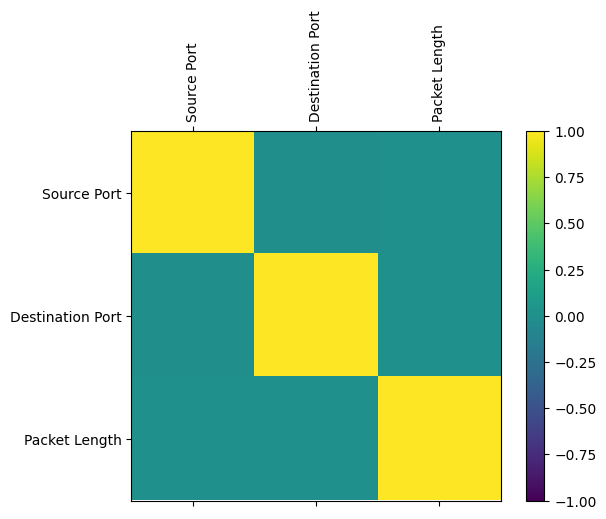

In [55]:
correlations = train_df[Kbest_col_list].corr(method = 'pearson')

show_corr_matrix(correlations, Kbest_col_list)

In [58]:
#create lists of the groups of data, include class in all, using train_data df with zero std columns removed.
frame_lst = []  # Initialize as empty lists
radiotap_lst = []
wlan_lst = []
wlan_mgmt_lst = []

# Check if 'class' column exists before adding it to the lists
if 'class' in train_data.columns:
    frame_lst.append('class')
    radiotap_lst.append('class')
    wlan_lst.append('class')
    wlan_mgmt_lst.append('class')

for column in train_data.columns:
    if column.startswith('frame.'):
        frame_lst.append(column)
    elif column.startswith('radiotap.'):
        radiotap_lst.append(column)
    elif column.startswith('wlan.'):
        wlan_lst.append(column)
    elif column.startswith('wlan_mgt.'):
        wlan_mgmt_lst.append(column)

print(len(frame_lst))
print(len(radiotap_lst))
print(len(wlan_lst))
print(len(wlan_mgmt_lst))

# Make correlations for each list, only if the list is not empty
if radiotap_lst:  # Check if radiotap_lst is not empty
    radiotap_corr = train_data[radiotap_lst].corr(method='pearson')
if wlan_lst:
    wlan_corr = train_data[wlan_lst].corr(method='pearson')
if wlan_mgmt_lst:
    wlan_mgmt_corr = train_data[wlan_mgmt_lst].corr(method='pearson')

0
0
0
0


In [59]:
#Understand spread of data in each category/list: frame
train_df[frame_lst].head(10)

""
0
1
2
3
4
5
6
7
8
9


In [61]:
import pandas as pd

def categorize_columns(df):
    """Categorizes columns based on their prefixes and includes 'class' if present."""
    categories = {'frame': [], 'radiotap': [], 'wlan': [], 'wlan_mgt': []}

    if 'class' in df.columns:
        for category in categories:
            categories[category].append('class')

    for column in df.columns:
        for prefix, category_list in categories.items():
            if column.startswith(prefix + '.'):
                category_list.append(column)
                break  # Exit inner loop once a match is found

    return categories

# Usage:
categories = categorize_columns(train_df)

# Accessing the lists:
frame_lst = categories['frame']
radiotap_lst = categories['radiotap']
wlan_lst = categories['wlan']
wlan_mgmt_lst = categories['wlan_mgt']

# Calculate correlations (only if lists are not empty):
correlations = {}
for prefix, category_list in categories.items():
    if category_list:
        correlations[prefix] = train_df[category_list].corr(method='pearson')

# Print lengths (optional):
for prefix, category_list in categories.items():
    print(f"Length of {prefix}_lst: {len(category_list)}")

Length of frame_lst: 0
Length of radiotap_lst: 0
Length of wlan_lst: 0
Length of wlan_mgt_lst: 0


In [65]:
import pandas as pd

def categorize_columns(df):
    """Categorizes columns based on their prefixes and includes 'class' if present."""
    categories = {'frame': [], 'radiotap': [], 'wlan': [], 'wlan_mgt': []}

    if 'class' in df.columns:
        for category in categories:
            categories[category].append('class')

    for column in df.columns:
        for prefix, category_list in categories.items():
            if column.startswith(prefix + '.'):
                category_list.append(column)
                break  # Exit inner loop once a match is found

    return categories

# Usage:
categories = categorize_columns(train_df)

# Accessing the lists:
frame_lst = categories['frame']
radiotap_lst = categories['radiotap']
wlan_lst = categories['wlan']
wlan_mgmt_lst = categories['wlan_mgt']


# Check if wlan_lst is empty and provide feedback or alternative action
if not wlan_lst:
    print("wlan_lst is empty. No 'wlan.' columns found in the DataFrame.")
else:
    # Calculate correlations (only if lists are not empty):
    correlations = {}
    for prefix, category_list in categories.items():
        if category_list:
            correlations[prefix] = train_df[category_list].corr(method='pearson')

    # Print lengths (optional):
    for prefix, category_list in categories.items():
        print(f"Length of {prefix}_lst: {len(category_list)}")

    #Proceed to describe the dataframe if wlan_lst is not empty
    train_df[wlan_lst].describe()

wlan_lst is empty. No 'wlan.' columns found in the DataFrame.


In [69]:
import pandas as pd

def categorize_columns(df):
    """Categorizes columns based on their prefixes and includes 'class' if present."""
    categories = {'frame': [], 'radiotap': [], 'wlan': [], 'wlan_mgt': []}

    if 'class' in df.columns:
        for category in categories:
            categories[category].append('class')

    for column in df.columns:
        for prefix, category_list in categories.items():
            if column.startswith(prefix + '.'):
                category_list.append(column)
                break  # Exit inner loop once a match is found

    return categories

# Usage:
categories = categorize_columns(train_df)

# Accessing the lists:
frame_lst = categories['frame']
radiotap_lst = categories['radiotap']
wlan_lst = categories['wlan']
wlan_mgmt_lst = categories['wlan_mgt']

# Calculate correlations for all categories, including 'frame'
correlations = {}
for prefix, category_list in categories.items():
    if category_list:  # Check if category_list is not empty
        correlations[prefix] = train_df[category_list].corr(method='pearson')

# Access the frame correlation matrix
frame_corr = correlations.get('frame')

# Check if frame_corr is defined before using it
if frame_corr is not None:
    show_corr_matrix(frame_corr, frame_lst)
else:
    print("frame_corr is not defined. This could be because there are no 'frame.' columns in your DataFrame.")

frame_corr is not defined. This could be because there are no 'frame.' columns in your DataFrame.


In [73]:
import pandas as pd
import matplotlib.pyplot as plt

def categorize_columns(df):
    """Categorizes columns based on their prefixes and includes 'class' if present."""
    categories = {'frame': [], 'radiotap': [], 'wlan': [], 'wlan_mgt': []}

    if 'class' in df.columns:
        for category in categories:
            categories[category].append('class')

    for column in df.columns:
        for prefix, category_list in categories.items():
            if column.startswith(prefix + '.'):
                category_list.append(column)
                break  # Exit inner loop once a match is found

    return categories

# Usage:
categories = categorize_columns(train_data)

# Accessing the lists:
frame_lst = categories['frame']
radiotap_lst = categories['radiotap']
wlan_lst = categories['wlan']
wlan_mgmt_lst = categories['wlan_mgt']

# Check if wlan_mgmt_lst is empty and provide feedback or alternative action
if not wlan_mgmt_lst:
    print("wlan_mgmt_lst is empty. No 'wlan_mgt.' columns found in the DataFrame.")
else:
    # Filter for numeric columns within wlan_mgmt_lst
    numeric_wlan_mgmt_lst = [col for col in wlan_mgmt_lst if pd.api.types.is_numeric_dtype(train_data[col])]

    # Check if any numeric columns were found
    if not numeric_wlan_mgmt_lst:
        print("No numeric columns found in wlan_mgmt_lst. Cannot create density plots.")
    else:
        # Proceed with plotting only the numeric columns
        train_data[numeric_wlan_mgmt_lst].plot(kind='density', subplots=True, sharex=True, layout=(6, 6), figsize=(15, 15))
        plt.show()

wlan_mgmt_lst is empty. No 'wlan_mgt.' columns found in the DataFrame.
